In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import os

import normalise_dataframe as ndf

In [2]:
df = pd.read_csv('Datasets/cleaned_data.csv')
df.head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature engineering

## Amount of time spent on phone late at night (9 - 12 pm)
- total
- business related applications
- entertainment related
- etc

In [3]:
def new_origninal_dataset():
    original_dataset = pd.read_csv('Datasets/mood_smartphone.csv', index_col=0)
    print(original_dataset.tail())

    whole_df = original_dataset.pivot_table(index=['time', 'id'], columns='variable', aggfunc='sum', values='value')

    whole_df['date'] = whole_df.index.get_level_values(0)
    whole_df['date'] = pd.to_datetime(whole_df['date'])

    whole_df['time'] = whole_df['date'].apply(lambda x: x.time())
    whole_df['date'] = whole_df['date'].apply(lambda x: x.date())

    # Convert time column to datetime format with a fixed date as a placeholder
    whole_df['hour_of_day_placeholder'] = pd.to_datetime(whole_df['time'].apply(lambda x: datetime.datetime(1900, 1, 1, x.hour)))

    return whole_df#.groupby(['id', 'date']).sum().reset_index()

whole_df = new_origninal_dataset()

whole_df.tail()

              id                     time        variable   value
2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431


,variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,date,time,hour_of_day_placeholder
time,id,,,,,,,,,,,,,,,,,,,,,
2014-06-08 11:03:34.453,AS14.24,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:03:34.453000,1900-01-01 11:00:00
2014-06-08 11:04:20.233,AS14.24,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:20.233000,1900-01-01 11:00:00
2014-06-08 11:04:36.299,AS14.24,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:36.299000,1900-01-01 11:00:00
2014-06-08 11:04:46.335,AS14.24,NaN,8.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:46.335000,1900-01-01 11:00:00
2014-06-09 00:00:00.000,AS14.24,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-09,00:00:00,1900-01-01 00:00:00


In [4]:
def add_late_night_use(df:pd.DataFrame, feature:str=None, start_hour=21, end_hour=23):

    new_feature_name = f'late_night_{feature}_use' if feature else 'late_night_phone_use'

    if feature is None:
        # Create boolean mask based on time hour and feature value
        mask = (df['hour_of_day_placeholder'].dt.hour.between(start_hour, end_hour))
    else:
        # Create boolean mask based on time hour and feature value
        mask = (df['hour_of_day_placeholder'].dt.hour.between(start_hour, end_hour)) & (df[feature] > 0)

    # Create a new column based on the mask
    df[new_feature_name] = False
    df.loc[mask, new_feature_name] = True

    return df

def late_night_usage(df:pd.DataFrame, features=None):

    # Convert time column to datetime format with a fixed date as a placeholder
    try:
        df['hour_of_day_placeholder'] = pd.to_datetime(df['time'].apply(lambda x: datetime.datetime(1900, 1, 1, x.hour)))
    except KeyError or AttributeError:
        df['hour_of_day_placeholder'] = pd.to_datetime([datetime.datetime(1900, 1, 1, x.hour) for x in df.index.get_level_values(2).to_list()])

    if features is None:
        df = add_late_night_use(df)
    else:
        for feature in features:
            df = add_late_night_use(df, feature=feature)

    # Drop the placeholder column
    df.drop('hour_of_day_placeholder', axis=1, inplace=True)
    
    return df



In [5]:
try:
    dataframe = pd.read_csv('ass1/Datasets/mood_smartphone.csv', index_col=0)
except FileNotFoundError:
    dataframe = pd.read_csv('Datasets/mood_smartphone.csv', index_col=0)

dataframe['date'] = pd.to_datetime(dataframe['time']).dt.date
dataframe['time'] = pd.to_datetime(dataframe['time']).dt.time

grouped_df = dataframe.groupby(['id', 'date', 'time', 'variable']).sum().reset_index()

print(grouped_df.head())

# grouped_df

        id        date             time variable  value
0  AS14.01  2014-02-17  12:04:42.394000     call    1.0
1  AS14.01  2014-02-17  18:28:25.520000     call    1.0
2  AS14.01  2014-02-18  09:29:51.257000     call    1.0
3  AS14.01  2014-02-19  14:43:30.575000     call    1.0
4  AS14.01  2014-02-19  17:29:10.378000     call    1.0


In [6]:
dataframe = grouped_df.pivot_table(index=['id', 'date', 'time'], columns='variable', values='value', aggfunc='sum')
dataframe = late_night_usage(dataframe)
dataframe.head()

# select the time index
#  = dataframe.index.get_level_values(2)

variable                            activity  appCat.builtin  \
id      date       time                                        
AS14.01 2014-02-17 12:04:42.394000       NaN             NaN   
                   18:28:25.520000       NaN             NaN   
        2014-02-18 09:29:51.257000       NaN             NaN   
        2014-02-19 14:43:30.575000       NaN             NaN   
                   17:29:10.378000       NaN             NaN   

variable                            appCat.communication  \
id      date       time                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN   
                   18:28:25.520000                   NaN   
        2014-02-18 09:29:51.257000                   NaN   
        2014-02-19 14:43:30.575000                   NaN   
                   17:29:10.378000                   NaN   

variable                            appCat.entertainment  appCat.finance  \
id      date       time                                                    
AS14.01 2014-02-17 12:04:42.394000                   NaN             NaN   
                   18:28:25.520000                   NaN             NaN   
        2014-02-18 09:29:51.257000                   NaN             NaN   
        2014-02-19 14:43:30.575000                   NaN             NaN   
                   17:29:10.378000                   NaN             NaN   

variable                            appCat.game  appCat.office  appCat.other  \
id      date       time                                                        
AS14.01 2014-02-17 12:04:42.394000          NaN            NaN           NaN   
                   18:28:25.520000          NaN            NaN           NaN   
        2014-02-18 09:29:51.257000          NaN            NaN           NaN   
        2014-02-19 14:43:30.575000          NaN            NaN           NaN   
                   17:29:10.378000          NaN            NaN           NaN   

variable                            appCat.social  appCat.travel  \
id      date       time                                            
AS14.01 2014-02-17 12:04:42.394000            NaN            NaN   
                   18:28:25.520000            NaN            NaN   
        2014-02-18 09:29:51.257000            NaN            NaN   
        2014-02-19 14:43:30.575000            NaN            NaN   
                   17:29:10.378000            NaN            NaN   

variable                            appCat.unknown  appCat.utilities  \
id      date       time                                                
AS14.01 2014-02-17 12:04:42.394000             NaN               NaN   
                   18:28:25.520000             NaN               NaN   
        2014-02-18 09:29:51.257000             NaN               NaN   
        2014-02-19 14:43:30.575000             NaN               NaN   
                   17:29:10.378000             NaN               NaN   

variable                            appCat.weather  call  circumplex.arousal  \
id      date       time                                                        
AS14.01 2014-02-17 12:04:42.394000             NaN   1.0                 NaN   
                   18:28:25.520000             NaN   1.0                 NaN   
        2014-02-18 09:29:51.257000             NaN   1.0                 NaN   
        2014-02-19 14:43:30.575000             NaN   1.0                 NaN   
                   17:29:10.378000             NaN   1.0                 NaN   

variable                            circumplex.valence  mood  screen  sms  \
id      date       time                                                     
AS14.01 2014-02-17 12:04:42.394000                 NaN   NaN     NaN  NaN   
                   18:28:25.520000                 NaN   NaN     NaN  NaN   
        2014-02-18 09:29:51.257000                 NaN   NaN     NaN  NaN   
        2014-02-19 14:43:30.575000                 NaN   NaN     NaN  NaN   
                   17:29:10.378

In [7]:
#check if aggregation is correct
def aggregation_for_variables(dataframe):
    agg_dict = {'mood': 'mean', 'circumplex.arousal': 'mean', 'circumplex.valence': 'mean', 'activity': 'mean', 'screen': 'sum', 'call': 'sum', 'sms': 'sum', 'appCat.builtin': 'sum', 'appCat.communication': 'sum', 'appCat.entertainment': 'sum', 'appCat.finance': 'sum', 'appCat.game': 'sum', 'appCat.office': 'sum', 'appCat.other': 'sum', 'appCat.social': 'sum', 'appCat.travel': 'sum', 'appCat.unknown': 'sum', 'appCat.weather': 'sum', 'appCat.utilities': 'sum'}

    late_night_cols = {col:'any' for col in dataframe.columns if 'late_night' in col}

    #join the two dictionaries
    agg_dict.update(late_night_cols)

    # Create df where some of the columns values are summed and for some the mean is taken for each day
    dataframe = dataframe.groupby(['date', 'id']).agg(agg_dict).reset_index()

    return dataframe

aggregation_for_variables(dataframe).head()

variable,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,late_night_phone_use
0,2014-02-17,AS14.01,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,2014-02-17,AS14.02,NaN,NaN,NaN,NaN,0.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,2014-02-17,AS14.03,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,2014-02-17,AS14.06,NaN,NaN,NaN,NaN,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,2014-02-17,AS14.08,NaN,NaN,NaN,NaN,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [8]:
#check if aggregation is correct
def aggregation_for_variables(dataframe):
    agg_dict = {'mood': 'mean', 'circumplex.arousal': 'mean', 'circumplex.valence': 'mean', 'activity': 'mean', 'screen': 'sum', 'call': 'sum', 'sms': 'sum', 'appCat.builtin': 'sum', 'appCat.communication': 'sum', 'appCat.entertainment': 'sum', 'appCat.finance': 'sum', 'appCat.game': 'sum', 'appCat.office': 'sum', 'appCat.other': 'sum', 'appCat.social': 'sum', 'appCat.travel': 'sum', 'appCat.unknown': 'sum', 'appCat.weather': 'sum', 'appCat.utilities': 'sum'}

    late_night_cols = {col:'any' for col in dataframe.columns if 'late_night' in col}

    #join the two dictionaries
    agg_dict.update(late_night_cols)

    # Create df where some of the columns values are summed and for some the mean is taken for each day
    dataframe = dataframe.groupby(['date', 'id']).agg(agg_dict).reset_index()

    return dataframe

aggregation_for_variables(dataframe).head()

variable,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,late_night_phone_use
0,2014-02-17,AS14.01,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,2014-02-17,AS14.02,NaN,NaN,NaN,NaN,0.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,2014-02-17,AS14.03,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,2014-02-17,AS14.06,NaN,NaN,NaN,NaN,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,2014-02-17,AS14.08,NaN,NaN,NaN,NaN,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [9]:
#test what happens when booleans are aggregated

#sample dataframe
test = pd.DataFrame({'a':[True, False, True, False], 'b':[True, True, False, False], 'c':[True, True, True, False]})
test['id'] = [1, 1, 2, 2]

print(test)

#groupby and aggregate
test.groupby('id').any()

# df

       a      b      c  id
0   True   True   True   1
1  False   True   True   1
2   True  False   True   2
3  False  False  False   2


,a,b,c
id,,,
1,True,True,True
2,True,False,True


## Since mood's correlation with valence, lets predict valence and provide as feature

In [10]:
#add mood for next day
df['mood_target'] = df['mood'].shift(-1)

<AxesSubplot:>

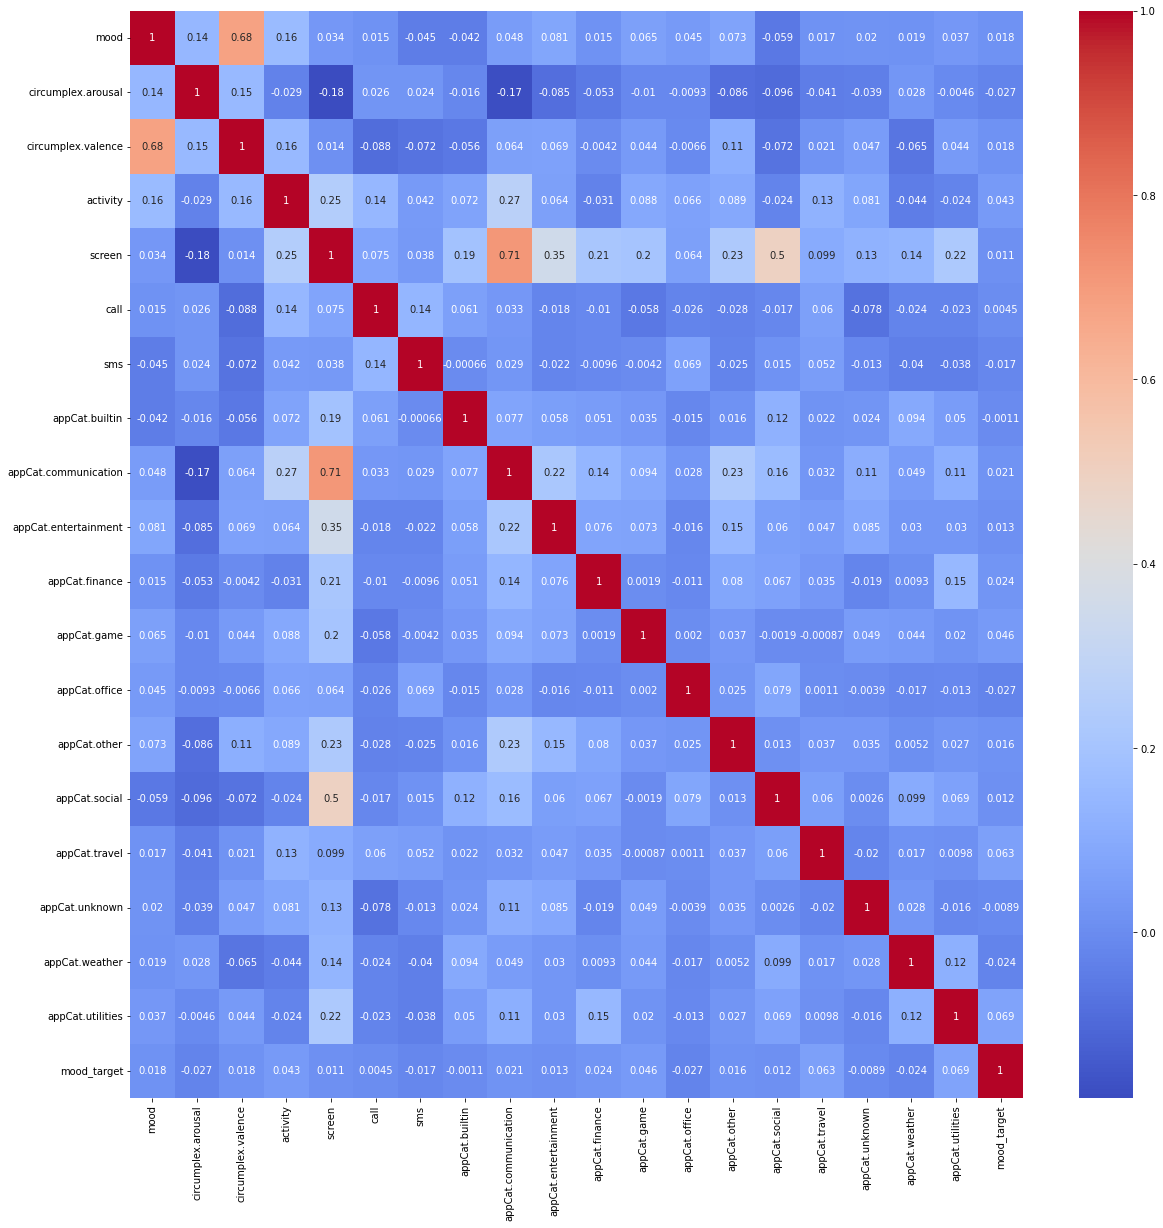

In [11]:

#plot heatmap of correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Adjust mood to classification problem
Transform mood from regression to classification problem
- round to integers

In [12]:
print(df['mood'].value_counts())
def round_feature(df:pd.DataFrame, feature:str):
    df[feature] = df[feature].round()
    return df

# round_feature(df, 'mood')['mood'].value_counts()

7.000000    244
7.200000     99
6.800000     81
8.000000     75
7.400000     73
           ... 
4.333333      1
6.166667      1
7.166667      1
4.666667      1
5.833333      1
Name: mood, Length: 69, dtype: int64


In [13]:
#nested cross validation

## Proportional changes

Predicting numbers may be more difficult than predicting changes. Added benefit is that the model may generalise better

In [14]:
def transform_to_pct_changes(df, feature):
    df[f'{feature}_pct_change'] = df[feature].pct_change()
    return df

def transform_to_absolute_changes(df, feature):
    df[f'{feature}_absolute_change'] = df[feature].diff()
    return df

df = transform_to_pct_changes(df, 'mood')
df = transform_to_absolute_changes(df, 'mood')

df[['mood', 'mood_target', 'mood_pct_change', 'mood_absolute_change']]

,mood,mood_target,mood_pct_change,mood_absolute_change
0,7.000000,6.333333,NaN,NaN
1,6.333333,8.000000,-0.095238,-0.666667
2,8.000000,7.250000,0.263158,1.666667
3,7.250000,7.200000,-0.093750,-0.750000
4,7.200000,7.500000,-0.006897,-0.050000
...,...,...,...,...
1300,7.000000,7.500000,0.000000,0.000000
1301,7.500000,8.000000,0.071429,0.500000
1302,8.000000,6.500000,0.066667,0.500000
1303,6.500000,6.500000,-0.187500,-1.500000


In [15]:
df[['mood', 'mood_target', 'mood_pct_change', 'mood_absolute_change']].describe()

,mood,mood_target,mood_pct_change,mood_absolute_change
count,1305.000000,1304.000000,1304.000000,1304.000000
mean,7.006635,7.006640,0.012892,-0.000383
std,0.739451,0.739734,0.166966,1.036403
min,3.000000,3.000000,-0.583333,-4.666667
25%,6.600000,6.600000,-0.085714,-0.600000
50%,7.000000,7.000000,0.000000,0.000000
75%,7.500000,7.500000,0.093750,0.600000
max,9.333333,9.333333,1.416667,4.250000


## Trailing values
Provide the previous values for 
- mood
- (features that are found the be of predictive value)

Usefull for algorithms not optimised for temporal data. 

In [16]:
df = transform_to_absolute_changes(df, 'activity')

In [17]:
def add_previous_values(df, feature, n):
    for i in range(1, n+1):
        df[f'{feature}_prev_{i}'] = df[feature].shift(i)
    return df

df = add_previous_values(df, 'activity_absolute_change', 3)
df[['activity_absolute_change', 'activity_absolute_change_prev_1', 'activity_absolute_change_prev_2', 'activity_absolute_change_prev_3']]

,activity_absolute_change,activity_absolute_change_prev_1,activity_absolute_change_prev_2,activity_absolute_change_prev_3
0,NaN,NaN,NaN,NaN
1,-0.036747,NaN,NaN,NaN
2,0.036747,-0.036747,NaN,NaN
3,0.000000,0.036747,-0.036747,NaN
4,-0.036747,0.000000,0.036747,-0.036747
...,...,...,...,...
1300,0.105958,-0.045092,0.052429,-0.008315
1301,0.037133,0.105958,-0.045092,0.052429
1302,-0.107583,0.037133,0.105958,-0.045092
1303,-0.002383,-0.107583,0.037133,0.105958


## Extract information about dates 
- Day of week
- Weekday/weekend
- Holidays
- number of days until weekend


In [18]:
def find_day_of_week(df):
    #find day of the week as integer
    df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
    return df
find_day_of_week(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.weather,appCat.utilities,mood_target,mood_pct_change,mood_absolute_change,activity_absolute_change,activity_absolute_change_prev_1,activity_absolute_change_prev_2,activity_absolute_change_prev_3,day_of_week
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,0.0,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,0.0,8.000000,-0.095238,-0.666667,-0.036747,NaN,NaN,NaN,2
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,0.0,7.250000,0.263158,1.666667,0.036747,-0.036747,NaN,NaN,2
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,0.0,7.200000,-0.093750,-0.750000,0.000000,0.036747,-0.036747,NaN,3
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,0.0,7.500000,-0.006897,-0.050000,-0.036747,0.000000,0.036747,-0.036747,3


In [19]:
def is_weekend(df):
    df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
    return df
is_weekend(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.utilities,mood_target,mood_pct_change,mood_absolute_change,activity_absolute_change,activity_absolute_change_prev_1,activity_absolute_change_prev_2,activity_absolute_change_prev_3,day_of_week,is_weekend
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,1,False
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,8.000000,-0.095238,-0.666667,-0.036747,NaN,NaN,NaN,2,False
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,7.250000,0.263158,1.666667,0.036747,-0.036747,NaN,NaN,2,False
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,7.200000,-0.093750,-0.750000,0.000000,0.036747,-0.036747,NaN,3,False
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,7.500000,-0.006897,-0.050000,-0.036747,0.000000,0.036747,-0.036747,3,False


In [20]:
def days_until_weekend(df):
    df['days_until_weekend'] = df['day_of_week'].map({'Monday': 5, 'Tuesday': 4, 'Wednesday': 3, 'Thursday': 2, 'Friday': 1, 'Saturday': 0, 'Sunday': 0})
    return df

days_until_weekend(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,mood_target,mood_pct_change,mood_absolute_change,activity_absolute_change,activity_absolute_change_prev_1,activity_absolute_change_prev_2,activity_absolute_change_prev_3,day_of_week,is_weekend,days_until_weekend
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,1,False,NaN
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,8.000000,-0.095238,-0.666667,-0.036747,NaN,NaN,NaN,2,False,NaN
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,7.250000,0.263158,1.666667,0.036747,-0.036747,NaN,NaN,2,False,NaN
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,7.200000,-0.093750,-0.750000,0.000000,0.036747,-0.036747,NaN,3,False,NaN
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,7.500000,-0.006897,-0.050000,-0.036747,0.000000,0.036747,-0.036747,3,False,NaN


In [21]:
import datetime
from dateutil import easter
from dateutil.relativedelta import relativedelta

def is_dutch_holiday(date, boolean=True):
    """
    Returns True if the given date is a Dutch holiday, False otherwise.
    
    Parameters:
    date (datetime.date): The date to check for being a Dutch holiday.
    
    Returns:
    bool: True if the given date is a Dutch holiday, False otherwise.
    """

    #date to datetime
    date = datetime.datetime.strptime(date, '%Y-%m-%d').date()

    # Check for fixed holidays
    fixed_holidays = {
        datetime.date(date.year, 1, 1): 'Nieuwjaarsdag',
        easter.easter(date.year) - relativedelta(days=2): 'Goede Vrijdag',
        easter.easter(date.year) : 'Eerste Paasdag',
        easter.easter(date.year) + relativedelta(days=1): 'Tweede Paasdag',
        easter.easter(date.year) + relativedelta(days=39): 'Hemelvaartsdag',
        easter.easter(date.year) + relativedelta(days=50): 'Eerste Pinksterdag',
        easter.easter(date.year) + relativedelta(days=51): 'Tweede Pinksterdag',
        datetime.date(date.year, 5, 5): 'Bevrijdingsdag',
        datetime.date(date.year, 12, 5): 'Sinterklaas',
        datetime.date(date.year, 12, 25): 'Eerste Kerstdag',
        datetime.date(date.year, 12, 26): 'Tweede Kerstdag'
    }
    if date in fixed_holidays:
        result = fixed_holidays[date]

    # Check for variable holidays
    kingsday = datetime.date(date.year, 4, 26) if date.weekday() == 0 else datetime.date(date.year, 4, 27)
    if date == kingsday:
        result = 'Koningsdag'
    
    # If the date is not a holiday, result = False
    result = False

    return (True if result else False) if boolean else result

def add_holiday(df):
    df['is_holiday'] = df['date'].apply(is_dutch_holiday)
    return df

print(add_holiday(df)['is_holiday'].value_counts())
add_holiday(df)['is_holiday'].describe()

False    1305
Name: is_holiday, dtype: int64


count      1305
unique        1
top       False
freq       1305
Name: is_holiday, dtype: object

In [22]:
date = '2014-4-18'
#date to datetime
date = datetime.datetime.strptime(date, '%Y-%m-%d').date()
print(date)

# Check for fixed holidays
fixed_holidays = {
    datetime.date(date.year, 1, 1): 'Nieuwjaarsdag',
    easter.easter(date.year) - relativedelta(days=2): 'Goede Vrijdag',
    easter.easter(date.year) : 'Eerste Paasdag',
    easter.easter(date.year) + relativedelta(days=1): 'Tweede Paasdag',
    easter.easter(date.year) + relativedelta(days=39): 'Hemelvaartsdag',
    easter.easter(date.year) + relativedelta(days=50): 'Eerste Pinksterdag',
    easter.easter(date.year) + relativedelta(days=51): 'Tweede Pinksterdag',
    datetime.date(date.year, 5, 5): 'Bevrijdingsdag',
    datetime.date(date.year, 12, 5): 'Sinterklaas',
    datetime.date(date.year, 12, 25): 'Eerste Kerstdag',
    datetime.date(date.year, 12, 26): 'Tweede Kerstdag'
}
# If the date is not a holiday, result = False
result = False

if date in fixed_holidays:
    result = fixed_holidays[date]

# Check for variable holidays
kingsday = datetime.date(date.year, 4, 26) if date.weekday() == 0 else datetime.date(date.year, 4, 27)
if date == kingsday:
    result = 'Koningsdag'


print(fixed_holidays[date])
print(result)


2014-04-18
Goede Vrijdag
Goede Vrijdag


In [23]:
df.date.unique()[0]

'2014-03-04'

## Determine what features to trail

In [25]:
# print(df[['mood', 'mood_target', 'mood_pct_change', 'mood_prev_1']].head())

#reorder columns such all mood related are last
df = df[[col for col in df.columns if col[:4] != 'mood'] + [col for col in df.columns if col[:4] == 'mood']]

In [26]:
df.is_holiday.value_counts()

False    1305
Name: is_holiday, dtype: int64

<AxesSubplot:>

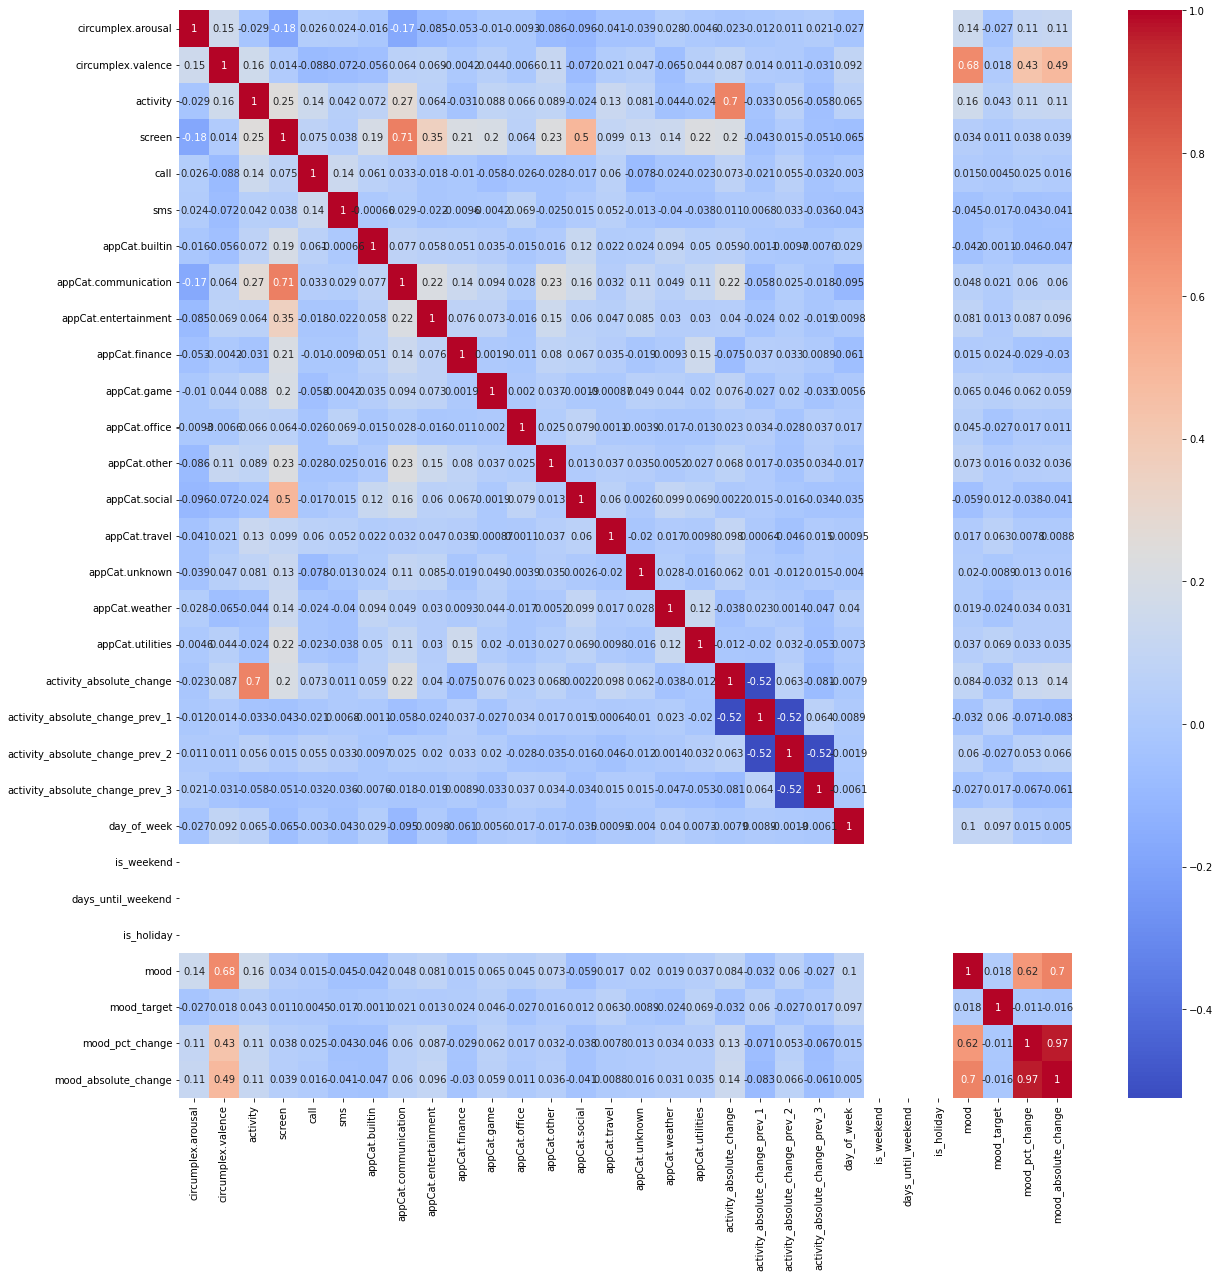

In [27]:
#add a random row to the df
# df = df.append({'date': '2014-7-1'}, ignore_index=True) #ketikoti
# df = df.append({'date': '2014-12-5'}, ignore_index=True) #sinterklaas


#plot heatmap of correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Normalise data

In [29]:
#test rescaler
def find_new_constants(df, column_name, path, rescale_constants={}):
    #get the min and max values from the collumn
    col_min = df[column_name].min()
    col_max = df[column_name].max()

    #save the min and max values in a dictionary
    rescale_constants[column_name] = {
            'min': col_min,
            'max': col_max,
        }

    #save the dictionary in a new pickle file
    with open(path, 'wb') as f:
        pickle.dump(rescale_constants, f)
    
    return rescale_constants


def rescale_all_others(df, column_name):
    #load file called "rescale_constants.pkl" from the folder "rescale_constants"
    try:
        path = 'ass1/rescale_constants.pkl'
        with open(path, 'rb') as f:
            rescale_constants = pickle.load(f)
    except FileNotFoundError:   
        try:
            path = 'rescale_constants.pkl'
            with open(path, 'rb') as f:
                rescale_constants = pickle.load(f)
        except:
            rescale_constants = find_new_constants(df, column_name, path)

    #check if the collumn is in dict
    if column_name not in rescale_constants:
        #if not, find the new min and max values
        rescale_constants = find_new_constants(df, column_name, path, rescale_constants)

    print(rescale_constants)
    #get the min and max values from the file
    col_min = rescale_constants[column_name]['min']
    col_max = rescale_constants[column_name]['max']

    #rescale the collumn
    df[column_name] = (df[column_name] - col_min) / (col_max - col_min)
    
    return df[column_name]

#test rescaler
rescale_all_others(df, 'activity')

{'appCat.weather': {'min': 0.0, 'max': 366.937}, 'activity': {'min': 0.0, 'max': 0.5661706349206349}}


0       0.074718
1       0.009813
2       0.074718
3       0.074718
4       0.009813
          ...   
1300    0.269076
1301    0.334662
1302    0.144644
1303    0.140435
1304    0.441563
Name: activity, Length: 1305, dtype: float64

In [31]:
#read pckl file
with open('rescale_constants.pkl', 'rb') as f:
    rescale_constants = pickle.load(f)
rescale_constants

FileNotFoundError: [Errno 2] No such file or directory: 'rescale_constants.pkl'

In [ ]:
df.columns

to_normalise = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.weather', 'appCat.utilities','mood_relative_change']

to_rescale = ['day_of_week',
       'is_weekend', 'days_until_weekend', 'is_holiday',]

all_previous = [col for col in df.columns if ('prev' or 'target')  in col] #can use the same model as their original feature

In [ ]:
# all_previous
[x for x in df.columns if x not in to_normalise ]

['date',
 'id',
 'call',
 'sms',
 'day_of_week',
 'is_weekend',
 'days_until_weekend',
 'is_holiday',
 'mood_target',
 'mood_pct_change',
 'mood_absolute_change',
 'mood_prev_1',
 'mood_prev_2',
 'mood_prev_3']

In [ ]:
#save current df 
# df.to_csv('Datasets/temp_feat.csv', index=False)

In [ ]:
print(df['mood_pct_change'].describe())
df['mood_pct_change'].value_counts()

#update fitter and scikit with pip
!pip install --upgrade fitter
!pip install --upgrade scikit-learn

count    1304.000000
mean        0.012892
std         0.166966
min        -0.583333
25%        -0.085714
50%         0.000000
75%         0.093750
max         1.416667
Name: mood_pct_change, dtype: float64

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


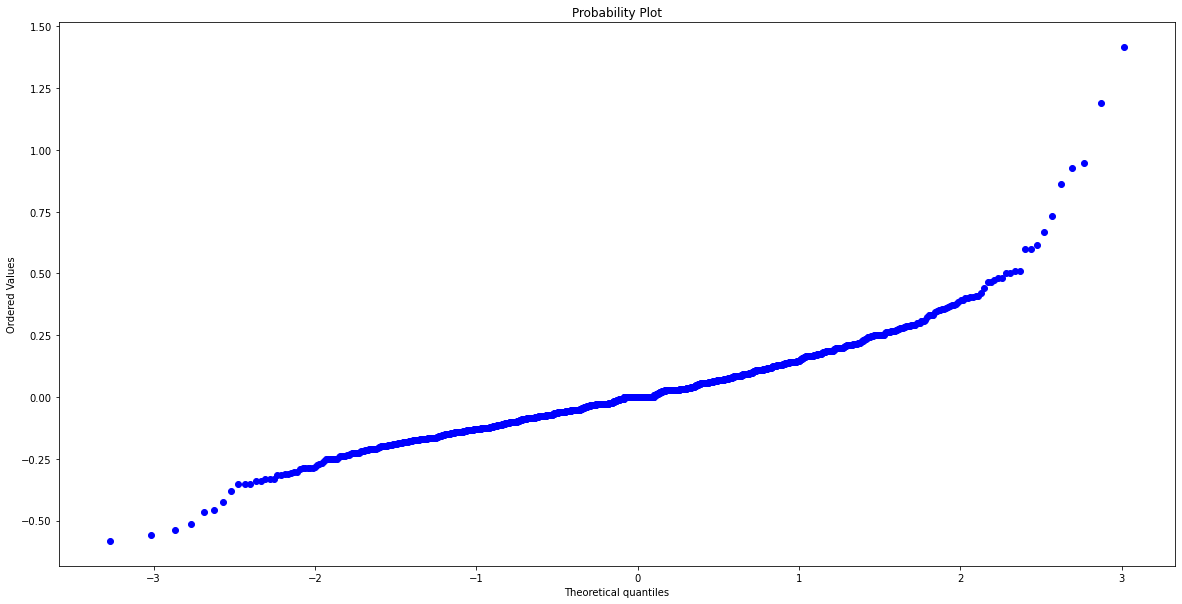

In [ ]:
import scipy.stats as stats
#plot qqplot for mood_relative_change
plt.figure(figsize=(20,10))
stats.probplot(df['mood_pct_change'], dist="norm", plot=plt)
plt.show()

In [ ]:
df.activity.describe()

count    1305.000000
mean        0.117878
std         0.098517
min         0.000000
25%         0.052006
50%         0.092856
75%         0.146970
max         0.566171
Name: activity, dtype: float64

In [ ]:
df['activity_prev_1'].describe()

count    1304.000000
mean        0.117777
std         0.098487
min         0.000000
25%         0.051950
50%         0.092810
75%         0.146882
max         0.566171
Name: activity_prev_1, dtype: float64

In [ ]:
col_to_test = 'activity_prev_1'

df['norm_test']= ndf.normalise_collumn_with_loaded_or_new_model(df, col_to_test, verbose=True)
df[col_to_test].describe()
#histograms of normalised screen in 1 plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=30, label='norm_test')
plt.legend()


---------------------------------------------------------------------------------------------------- 
fit a model for activity_prev_1 and transform the collumn (activity not found)
 ----------------------------------------------------------------------------------------------------


Fitting 106 distributions:  25%|██▌       | 27/106 [00:05<00:36,  2.17it/s]/Users/QuinnScot/.pyenv/versions/3.9.0/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3102: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/Users/QuinnScot/.pyenv/versions/3.9.0/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3102: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 106 distributions:  25%|██▌       | 27/106 [00:06<00:18,  4.27it/s]


KeyboardInterrupt: 

In [ ]:
col_to_test = 'circumplex.valence_absolute_change'

df['norm_test']= ndf.apply_statistical_model(df, col_to_test, only_collumn=True)
df[col_to_test].describe()
#histograms of normalised screen in 1 plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=15, label='norm_test')
plt.legend()


KeyError: 'circumplex.valence_absolute_change'

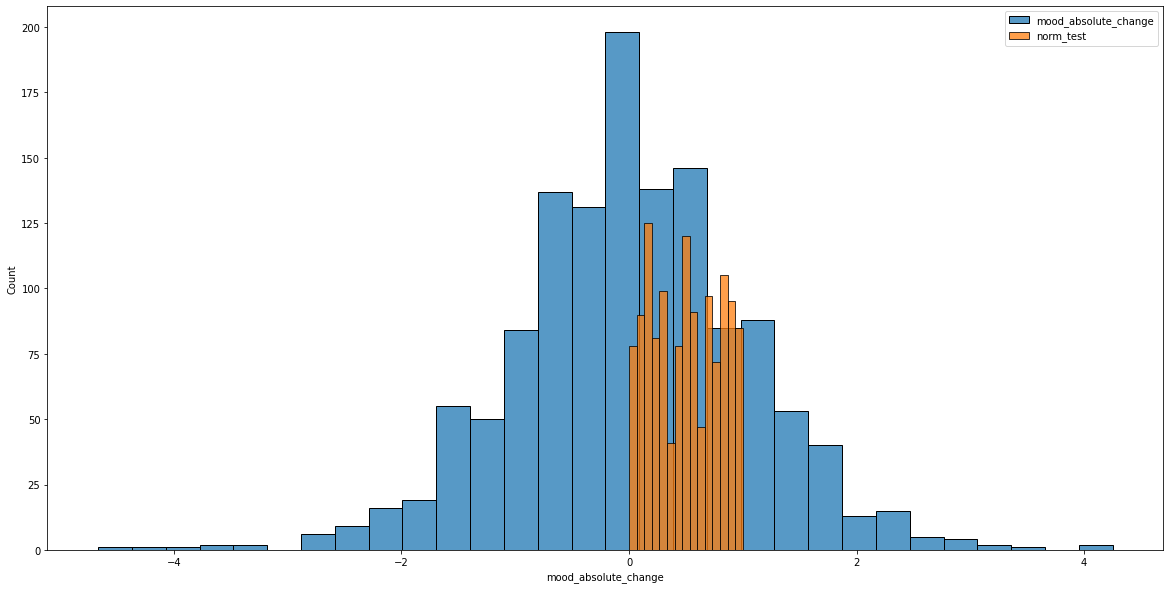

In [ ]:
col_to_test = 'mood_absolute_change'

df['norm_test']= ndf.apply_statistical_model(df, col_to_test, only_collumn=True)
df[col_to_test].describe()
#histograms of normalised screen in 1 plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=15, label='norm_test')
plt.legend()


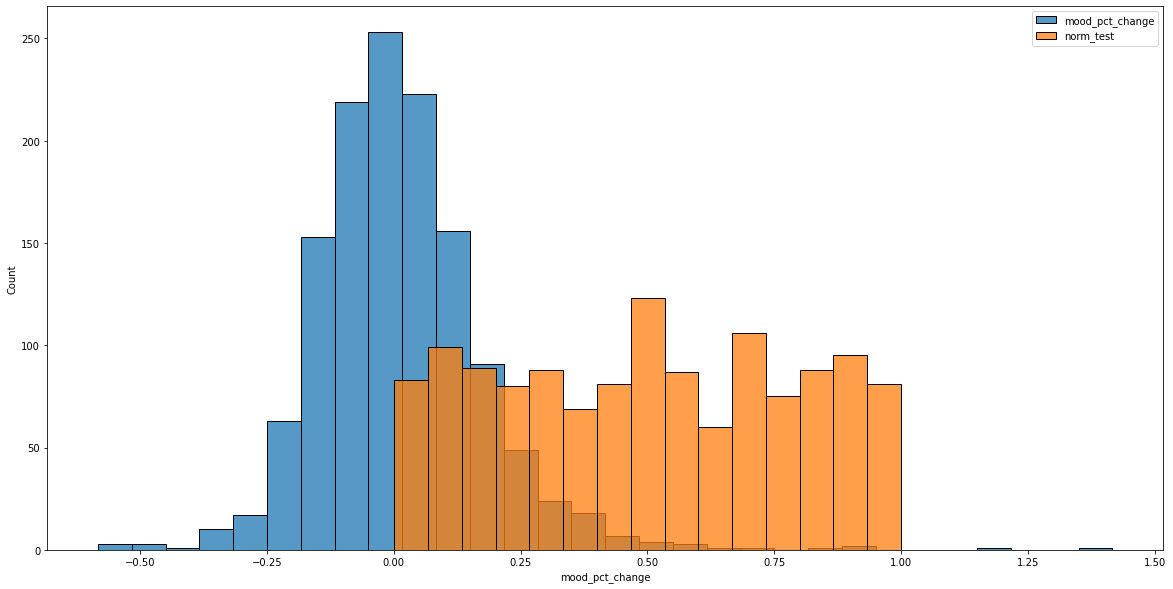

In [ ]:
col_to_test = 'mood_pct_change'

df['norm_test']= ndf.apply_statistical_model(df, col_to_test, only_collumn=True)
df[col_to_test].describe()
#histograms of normalised screen in 1 plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=15, label='norm_test')
plt.legend()


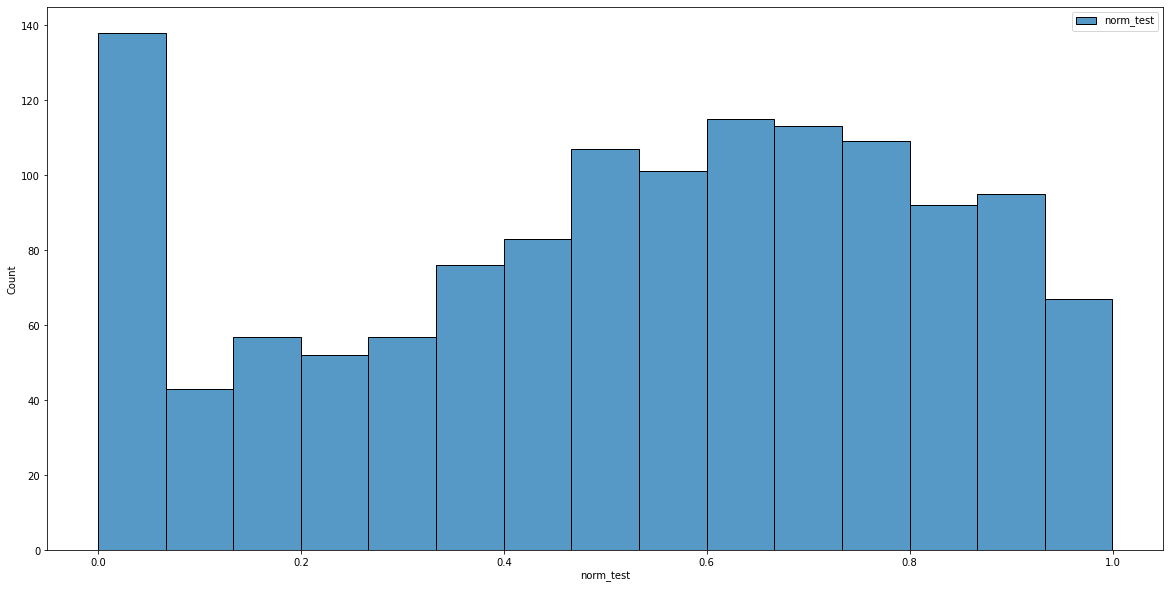

In [ ]:
col_to_test = 'screen'

df['norm_test']= ndf.apply_statistical_model(df, col_to_test, only_collumn=True)
df[col_to_test].describe()
#histograms of normalised screen in 1 plot
plt.figure(figsize=(20,10))
# sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=15, label='norm_test')
plt.legend()


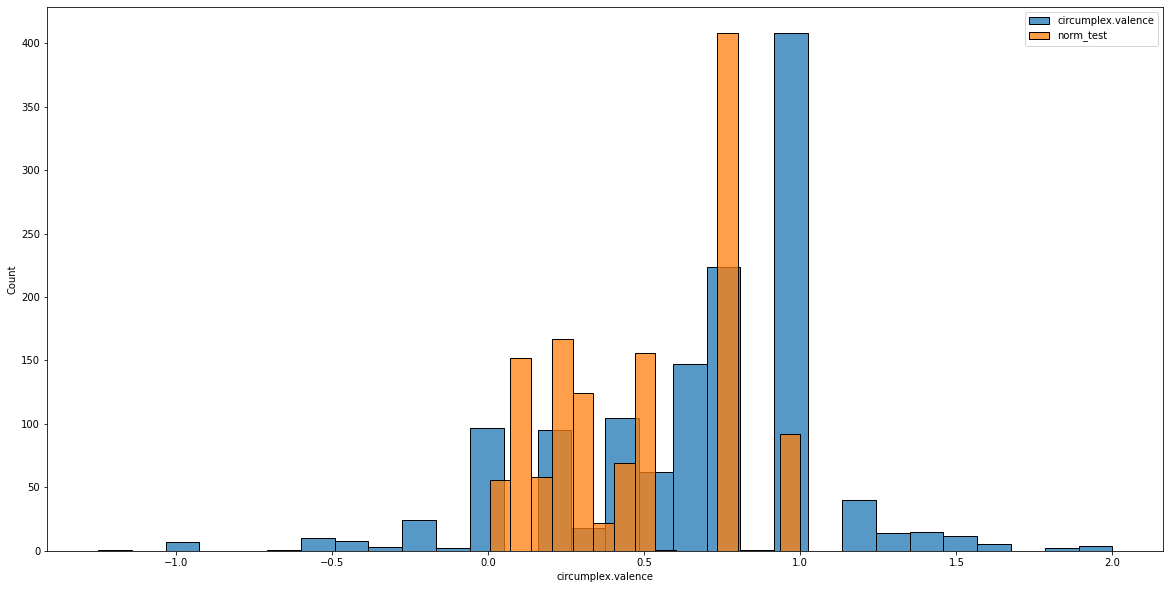

In [ ]:
col_to_test = 'circumplex.valence'

df['norm_test']= ndf.apply_statistical_model(df, col_to_test, only_collumn=True)
df[col_to_test].describe()
#histograms of normalised valence in 1 plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=15, label='norm_test')
plt.legend()


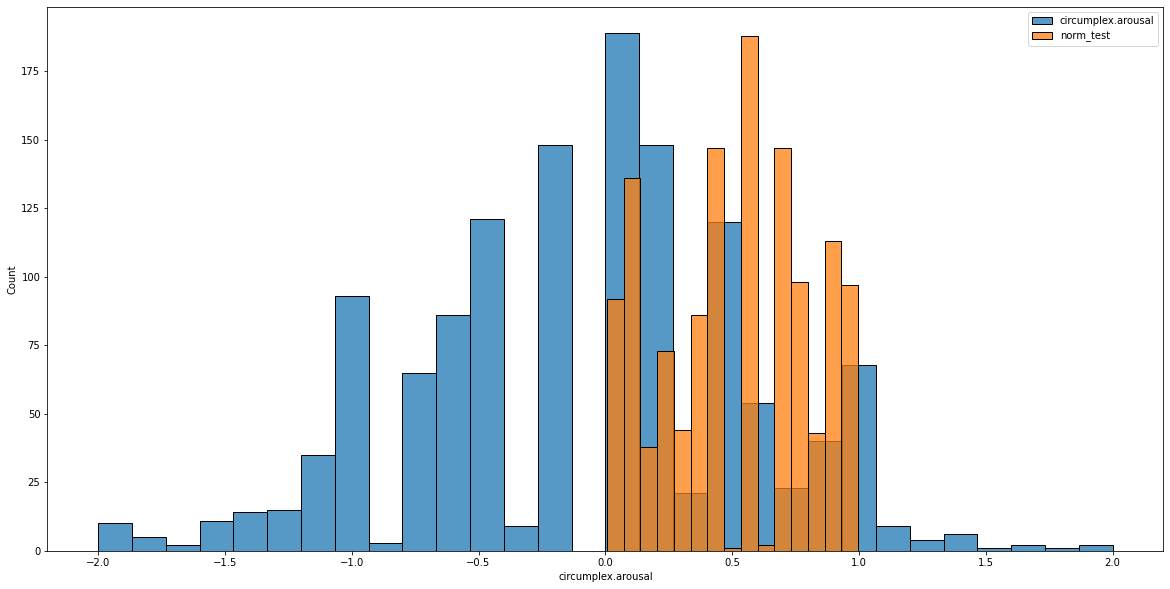

In [ ]:
col_to_test = 'circumplex.arousal'

df['norm_test']= ndf.apply_statistical_model(df, col_to_test, only_collumn=True)
df[col_to_test].describe()

#histograms of normalised arousal and arousal in 1 plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x=col_to_test, bins=30, label=col_to_test)
sns.histplot(data=df, x='norm_test', bins=15, label='norm_test')
plt.legend()


In [ ]:
pre_norm = df

# def normalise_collumn_with_loaded_or_new_model(df, col):
#     #continue if there is not allready a file with the normalise model in the folder
#     if not os.path.isfile(f'stastical_distributions/model_dict_{col}.pkl'):
#         print('-'*100,f'\nfit a model for {col} and transform the collumn\n', '-'*100)
#         #fit a normalisation model and apply it to the collumn
#         normalised_col = ndf.normalise_collumn(df, collumn_name=col, only_collumn=True)
#     else:
#         print('-'*50,f'\nfound model for {col}')
#         #transform the collumn with the allready existing model
#         normalised_col = ndf.apply_statistical_model(df, collumn_name=col, only_collumn=True)

#     return normalised_col

# def normalise_collumns_from_list(df:pd.DataFrame, collumns_list):
#     #loop over collumns 
#     for col in collumns_list:
#         #normalise the collumn
#         df[col] = normalise_collumn_with_loaded_or_new_model(df, col)
#     return df

# # df = normalise_collumns_from_list(df, to_normalise)

In [ ]:
to_normalise

['mood',
 'circumplex.arousal',
 'circumplex.valence',
 'activity',
 'screen',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.weather',
 'appCat.utilities',
 'mood_relative_change']

In [ ]:


df.describe()

,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,day_of_week,days_until_weekend,mood,mood_target,mood_pct_change,mood_absolute_change,mood_prev_1,mood_prev_2,mood_prev_3,norm_mood
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,...,1305.000000,0.0,1305.000000,1304.000000,1304.000000,1304.000000,1304.000000,1303.000000,1302.000000,1305.000000
mean,-0.107363,0.670677,0.117878,5565.181316,2.260536,0.817625,1357.207153,2460.611175,779.238554,15.653779,...,3.016092,NaN,7.006635,7.006640,0.012892,-0.000383,7.007023,7.007412,7.006650,0.516012
std,0.666762,0.429481,0.098517,4796.484451,3.349917,1.824886,2924.825358,2482.297467,1652.438213,71.541148,...,2.002426,NaN,0.739451,0.739734,0.166966,1.036403,0.739601,0.739751,0.739524,0.249060
min,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,3.000000,3.000000,-0.583333,-4.666667,3.000000,3.000000,3.000000,0.140091
25%,-0.600000,0.400000,0.052006,1735.448000,0.000000,0.000000,163.942000,520.243000,0.000000,0.000000,...,1.000000,NaN,6.600000,6.600000,-0.085714,-0.600000,6.600000,6.600000,6.600000,0.237026
50%,0.000000,0.800000,0.092856,4656.295000,1.000000,0.000000,661.679000,1812.734000,173.542000,0.000000,...,3.000000,NaN,7.000000,7.000000,0.000000,0.000000,7.000000,7.000000,7.000000,0.499849
75%,0.400000,1.000000,0.146970,8166.500999,3.000000,1.000000,1464.056000,3558.812000,966.003000,0.000000,...,5.000000,NaN,7.500000,7.500000,0.093750,0.600000,7.500000,7.500000,7.500000,0.772175
max,2.000000,2.000000,0.566171,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,...,6.000000,NaN,9.333333,9.333333,1.416667,4.250000,9.333333,9.333333,9.333333,0.837349


In [ ]:
df.head()

,date,id,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,days_until_weekend,is_holiday,mood,mood_target,mood_pct_change,mood_absolute_change,mood_prev_1,mood_prev_2,mood_prev_3,norm_mood
0,2014-03-04,AS14.17,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,0.0,...,NaN,False,7.000000,6.333333,NaN,NaN,NaN,NaN,NaN,0.499849
1,2014-03-05,AS14.08,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,0.0,...,NaN,False,6.333333,8.000000,-0.095238,-0.666667,7.000000,NaN,NaN,0.215816
2,2014-03-05,AS14.17,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,0.0,...,NaN,False,8.000000,7.250000,0.263158,1.666667,6.333333,7.000000,NaN,0.801319
3,2014-03-06,AS14.17,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,0.0,...,NaN,False,7.250000,7.200000,-0.093750,-0.750000,8.000000,6.333333,7.000000,0.744006
4,2014-03-06,AS14.08,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,0.0,...,NaN,False,7.200000,7.500000,-0.006897,-0.050000,7.250000,8.000000,6.333333,0.735227


In [ ]:
pre_norm.describe()

,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,day_of_week,days_until_weekend,mood,mood_target,mood_pct_change,mood_absolute_change,mood_prev_1,mood_prev_2,mood_prev_3,norm_mood
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,...,1305.000000,0.0,1305.000000,1304.000000,1304.000000,1304.000000,1304.000000,1303.000000,1302.000000,1305.000000
mean,-0.107363,0.670677,0.117878,5565.181316,2.260536,0.817625,1357.207153,2460.611175,779.238554,15.653779,...,3.016092,NaN,7.006635,7.006640,0.012892,-0.000383,7.007023,7.007412,7.006650,0.516012
std,0.666762,0.429481,0.098517,4796.484451,3.349917,1.824886,2924.825358,2482.297467,1652.438213,71.541148,...,2.002426,NaN,0.739451,0.739734,0.166966,1.036403,0.739601,0.739751,0.739524,0.249060
min,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,3.000000,3.000000,-0.583333,-4.666667,3.000000,3.000000,3.000000,0.140091
25%,-0.600000,0.400000,0.052006,1735.448000,0.000000,0.000000,163.942000,520.243000,0.000000,0.000000,...,1.000000,NaN,6.600000,6.600000,-0.085714,-0.600000,6.600000,6.600000,6.600000,0.237026
50%,0.000000,0.800000,0.092856,4656.295000,1.000000,0.000000,661.679000,1812.734000,173.542000,0.000000,...,3.000000,NaN,7.000000,7.000000,0.000000,0.000000,7.000000,7.000000,7.000000,0.499849
75%,0.400000,1.000000,0.146970,8166.500999,3.000000,1.000000,1464.056000,3558.812000,966.003000,0.000000,...,5.000000,NaN,7.500000,7.500000,0.093750,0.600000,7.500000,7.500000,7.500000,0.772175
max,2.000000,2.000000,0.566171,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,...,6.000000,NaN,9.333333,9.333333,1.416667,4.250000,9.333333,9.333333,9.333333,0.837349


In [ ]:
df.describe()['mood']

count    1305.000000
mean        7.006635
std         0.739451
min         3.000000
25%         6.600000
50%         7.000000
75%         7.500000
max         9.333333
Name: mood, dtype: float64

/var/folders/k0/0lwkwvkd1mv58kbv8hrhv1q00000gn/T/ipykernel_68380/732521169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pre_norm['mood'], bins=20)


<AxesSubplot:xlabel='mood', ylabel='Density'>

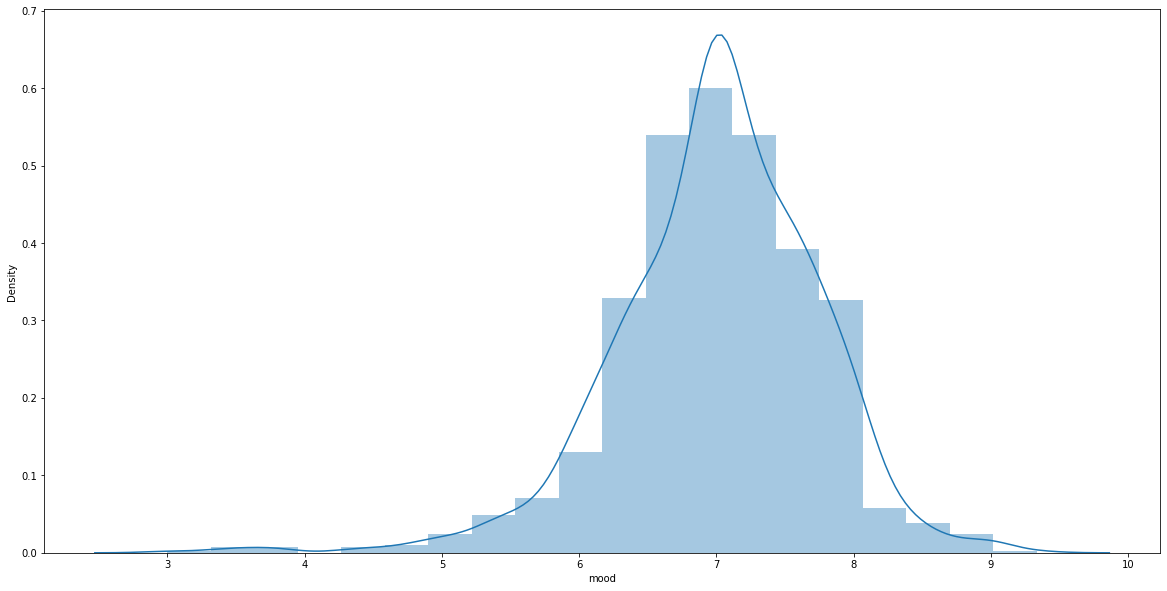

In [ ]:
#plot histogram of mood
plt.figure(figsize=(20,10))
sns.distplot(pre_norm['mood'], bins=20)

/var/folders/k0/0lwkwvkd1mv58kbv8hrhv1q00000gn/T/ipykernel_68380/2672349241.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mood'], bins=20)


<AxesSubplot:xlabel='mood', ylabel='Density'>

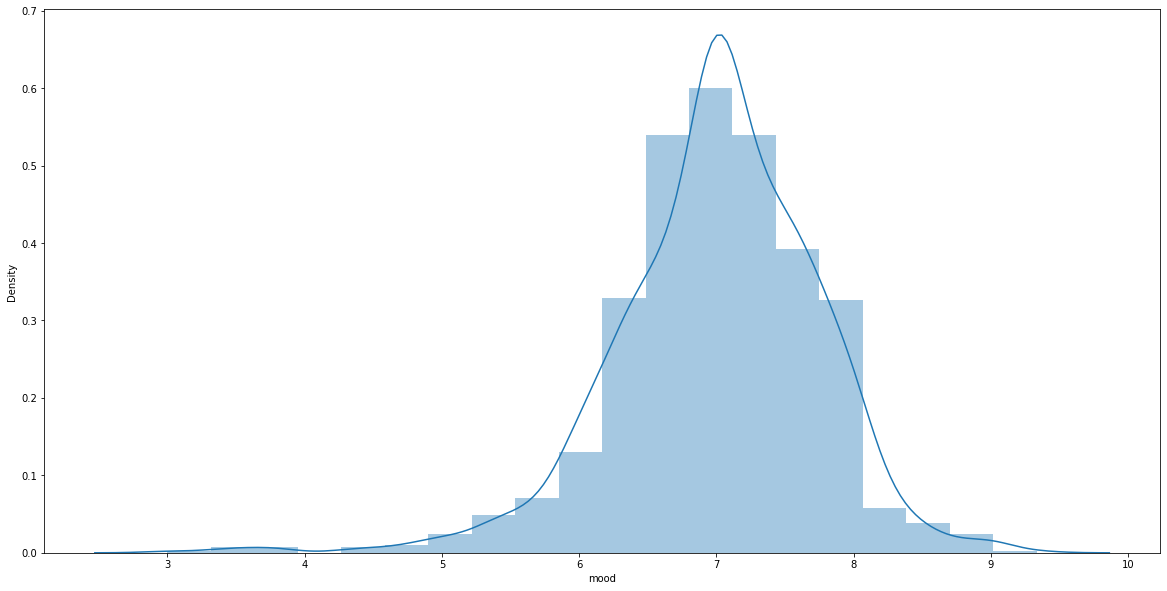

In [ ]:
#plot histogram of mood
plt.figure(figsize=(20,10))
sns.distplot(df['mood'], bins=20)

## One hot encoding for categorical variables (id)

In [ ]:
def one_hot_encode_feature(df:pd.DataFrame, feature:str):
    one_hot = pd.get_dummies(df[feature])
    df = df.drop(feature,axis = 1)
    df = df.join(one_hot)
    return df

df = one_hot_encode_feature(df, 'id')